In [5]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_df = pd.read_csv(mouse_drug_data_to_load)
trial_df = pd.read_csv(clinical_trial_data_to_load)

#trial_df.head()
#mouse_df.head()


# Combine the data into a single dataset
combined_df = pd.merge(mouse_df,trial_df, how = 'outer',on = ["Mouse ID", "Mouse ID"])


# Display the data table for preview
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 

tumor_vol = combined_df.groupby(["Drug", "Timepoint"])

#convert to DataFrame
avg_tumor_vol = pd.DataFrame(tumor_vol.mean()['Tumor Volume (mm3)']).head()


## Tumor Response to Treatment

In [6]:

# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 

tumor_vol = combined_df.groupby(["Drug", "Timepoint"])

#convert to DataFrame
avg_tumor_vol = pd.DataFrame(tumor_vol.mean()['Tumor Volume (mm3)'])


In [11]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint

stdError_tumor_vol = pd.DataFrame(tumor_vol.sem()['Tumor Volume (mm3)'])

stdError_tumor_vol.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731

In [12]:
# Minor Data Munging to Re-Format the Data Frames
avg_tumor_vol = avg_tumor_vol.unstack(0)
avg_tumor_vol.columns = avg_tumor_vol.columns.get_level_values(1)
avg_tumor_vol


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [13]:
stdError_tumor_vol = stdError_tumor_vol.unstack(0)
stdError_tumor_vol.columns = stdError_tumor_vol.columns.get_level_values(1)
stdError_tumor_vol

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182
25,0.881642,0.439356,0.550315,0.755413,0.813706,1.034872,0.577401,0.746991,0.741922,0.602513
30,0.934460,0.490620,0.631061,0.934121,0.975496,1.218231,0.746045,0.864906,0.899548,0.800043
35,1.052241,0.692248,0.984155,1.127867,1.013769,1.287481,1.084929,0.967433,1.003186,0.881426
40,1.223608,0.708505,1.055220,1.158449,1.118567,1.370634,1.564779,1.128445,1.410435,0.998515


No handles with labels found to put in legend.


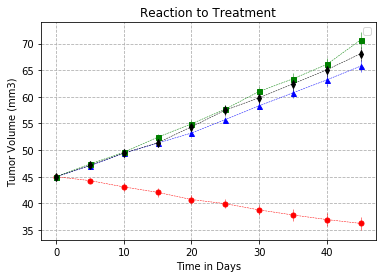

In [14]:
#Generate the Plot (with Error Bars)
x_axis = np.arange(0, 50, 10)
x_limit = 45

plt.figure(figsize=(6,4))

plt.errorbar(avg_tumor_vol.index, avg_tumor_vol["Capomulin"], yerr=stdError_tumor_vol["Capomulin"],\
             color="r", marker="o", markersize=5, linestyle="dashed", linewidth=0.50)

plt.errorbar(avg_tumor_vol.index, avg_tumor_vol["Infubinol"], yerr=stdError_tumor_vol["Infubinol"],\
             color="b", marker="^", markersize=5, linestyle="dashed", linewidth=0.50)

plt.errorbar(avg_tumor_vol.index, avg_tumor_vol["Ketapril"],yerr=stdError_tumor_vol["Ketapril"],\
             color="g", marker="s", markersize=5, linestyle="dashed", linewidth=0.50)

plt.errorbar(avg_tumor_vol.index, avg_tumor_vol["Placebo"],yerr=stdError_tumor_vol["Placebo"],\
             color="k", marker="d", markersize=5, linestyle="dashed", linewidth=0.50)



# Set x and y axis labels including the title of the chart

plt.title("Reaction to Treatment")
plt.xlabel("Time in Days")
plt.ylabel("Tumor Volume (mm3)") 

#plt.style.use('seaborn-whitegrid')
#plt.grid(linestyle="dashed")

plt.grid(linestyle="dashed")
plt.legend(loc='best')

# Save the figure
plt.savefig("Response Per Treatment.png")

# Show the plot
plt.show()





![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [15]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 

meta_avg = combined_df.groupby(['Drug', 'Timepoint'])


# Convert to DataFrame
meta_mean = pd.DataFrame(meta_avg.mean()['Metastatic Sites'])

# Preview DataFrame
meta_mean.head()




Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [17]:
meta_mean = meta_mean.unstack(0)
meta_mean.columns = meta_mean.columns.get_level_values(1)
meta_mean








Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


In [19]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
meta_stde = combined_df.groupby(['Drug', 'Timepoint'])



# Convert to DataFrame
meta_standerror = pd.DataFrame(meta_stde.mean()['Metastatic Sites'])

# Preview DataFrame
meta_standerror.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [20]:
meta_standerror = meta_standerror.unstack(0)
meta_standerror.columns = meta_standerror.columns.get_level_values(1)
meta_standerror


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


No handles with labels found to put in legend.


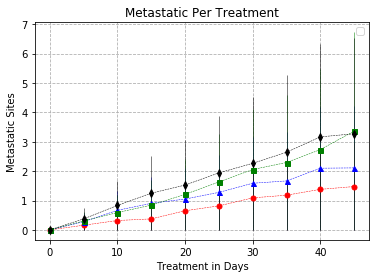

In [21]:
plt.errorbar(meta_mean.index, meta_mean["Capomulin"], yerr=meta_standerror["Capomulin"],\
             color="r", marker="o", markersize=5, linestyle="dashed", linewidth=0.50)

plt.errorbar(meta_mean.index, meta_mean["Infubinol"], yerr=meta_standerror["Infubinol"],\
             color="b", marker="^", markersize=5, linestyle="dashed", linewidth=0.50)

plt.errorbar(meta_mean.index, meta_mean["Ketapril"],yerr=meta_standerror["Ketapril"],\
             color="g", marker="s", markersize=5, linestyle="dashed", linewidth=0.50)

plt.errorbar(meta_mean.index, meta_mean["Placebo"],yerr=meta_standerror["Placebo"],\
             color="k", marker="d", markersize=5, linestyle="dashed", linewidth=0.50)



plt.title('Metastatic Per Treatment') 
plt.xlabel('Treatment in Days') 
plt.ylabel('Metastatic Sites') 


plt.grid(linestyle="dashed")
plt.legend(loc='best')


plt.savefig("Met Per Treatment.png")

![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [23]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

micecount = combined_df.groupby(['Drug', 'Timepoint']).count()

# Convert to DataFrame
micecount = pd.DataFrame({"Mice Count": micecount["Mouse ID"]})

# Preview DataFrame
micecount.head()





Mice Count
Drug      Timepoint            
Capomulin 0                  25
          5                  25
          10                 25
          15                 24
          20                 23

In [24]:
# Minor Data Munging to Re-Format the Data Frames



# Minor Data Munging to Re-Format the Data Frames

# Preview the Data Frame


micecount = micecount.unstack(0)
micecount.columns = micecount.columns.get_level_values(1)
micecount.head()




Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


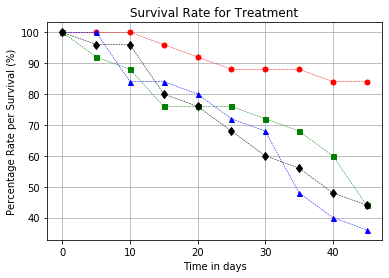

No handles with labels found to put in legend.


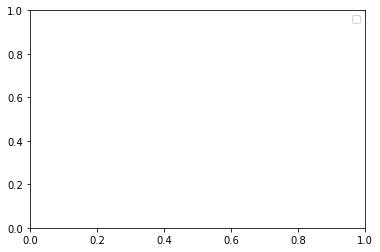

In [25]:
# Generate the Plot (Accounting for percentages)

plt.plot(100 * micecount["Capomulin"] / 25, "ro", linestyle="dashed", markersize=5, linewidth=0.50)

plt.plot(100 * micecount["Infubinol"] / 25, "b^", linestyle="dashed", markersize=5, linewidth=0.50)

plt.plot(100 * micecount["Ketapril"] / 25, "gs", linestyle="dashed", markersize=5, linewidth=0.50)

plt.plot(100 * micecount["Placebo"] / 25 , "kd", linestyle="dashed", markersize=6, linewidth=0.50)


plt.title("Survival Rate for Treatment") 
plt.ylabel("Percentage Rate per Survival (%)") 
plt.xlabel("Time in days") 

plt.grid(True)

# Save the Figure
plt.savefig("SurvivalPerTreatment.png")

# Show the Figure
plt.show()

# Save the Figure

plt.legend() 



![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [27]:
# Calculate the percent changes for each drug

# Display the data to confirm
per_change = (avg_tumor_vol.loc[45, :] - avg_tumor_vol.loc[0, :])/avg_tumor_vol.loc[0, :] * 100
per_change

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

In [ ]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()

![Metastatic Spread During Treatment](../Images/change.png)